
# DESCRIPCIÓN DEL DATASET

El siguiente dataset contiene los datos de consumo de combustible para 946 vehículos en Norte América y Europa. Se presentan datos como el tamaño del motor, tipo de transmisión, emisiones en CO2, tipo de combustible, consumo de combustible en litros cada 100 km y en millas por galón, tanto en ciudad como en la autopista.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/MY2022 Fuel Consumption Ratings.csv")
df

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

# Análisis de consumo 


## Análisis de consumo combinado L/100km por Marca

Análisis de consumo combinado en los Litros que se necesitan para recorrer 100km, en cada una de las Marcas de autos del dataset.

La mayoría de marcas con mayor volumen de ventas como Hyundai, Kia, Ford o Toyota, se encuentran dentro del mismo rango, puesto que deben competir para obtener mejores ventas. Caso contrario de una marca exclusiva como Buggati que se considerar como caso atípicos extremos o Lamborguini como más atípico que extremo. Dato interesante de Rolls Royce en que tiene muy pocos modelos y con consumos de combustible muy similares.

In [ ]:

sns.set(rc={'figure.figsize':(12, 10)})
sns.set_style("white") 
sns.boxplot(y=df.Make, x=df["Fuel Consumption(Comb (L/100 km))"], orient="h")
plt.title("Consumo de Combustible por Marca")
plt.gca().xaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.15) 
plt.show()

## Consumo por una marca en específico

Este es un gráfico que presenta el consumo de millas por galón, en una marca determinada. En este caso se hace la prueba con Lexus y contrario a la intuición que se pueda tener las barras más altas indican un menor consumo, dado a que se está midiendo la distancia máxima en millas que se puede recorrer con un galón de combustible. 

Por ejemplo la Lexus LX 600 es una camioneta de gran tamaño con un motor de gran desplazamiento, lo que deriva un consumo muy alto respecto   al modelo Lexus ES 300h, siendo este un vehículo híbrido. La media de consumo de combustible, entre todos los modelos de Lexus es 30.50 MPG vs al promedio general del  dataset que son 27.25 MPG, lo que dice que en promedio Lexus no es tan eficiente. Sin embargo, Lexus no tiene tantos modelos como Ford, que en promedio arroja un consumo de 24.75 MPG con 

In [ ]:
# Ingrese una marca

marcaVehiculo = "Lexus"
df_make = df[df["Make"] == marcaVehiculo] 
df_make

tittle = "Consumo de Modelos "+marcaVehiculo
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("dark")

df_make.plot(x='Model', y='Fuel Consumption(Comb (mpg))', kind = 'bar', 
                                                                       legend=False, 
                                                                       ylabel='Consumo (MPG)', 
                                                                       xlabel='Modelo', 
                                                                       title=tittle)                                                                      
plt.gca().yaxis.grid(True, linestyle='--', which='minor', color='white', alpha=.15)
plt.show()

In [ ]:
media = np.mean(df_make["Fuel Consumption(Comb (mpg))"])
print("Media de MPG para Lexus: {0:.2f}".format(media))

marcaVehiculo = "Ford"
df_make = df[df["Make"] == marcaVehiculo] 

media = np.mean(df_make["Fuel Consumption(Comb (mpg))"])
print("Media de MPG para Ford: {0:.2f}".format(media))

Media de MPG para Lexus: 30.50
Media de MPG para Ford: 24.75


# Analisis del uso de transmisores


## Análisis de los transmisores mas utilizados

Analizaremos en nuestra base de datos cuales son los 3 tipos de transmisores mas utilizados y a su vez la marca de vehiculos que mas la utiliza.

Los distintos modelos de automoviles analizados no siempre usan la misma transmision, por lo cual se grafica la cantidad de veces que se repite el uso de los transmisores en los distintos modelos de nuestra base de datos.

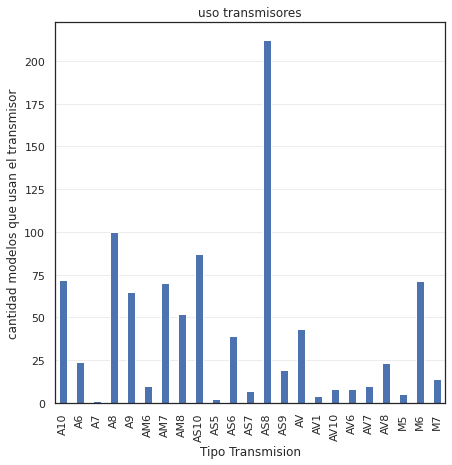

In [ ]:
sns.set(rc={'figure.figsize':(7, 7)}) 
sns.set_style("white") #fondo blanco
df.reset_index().groupby(['Transmission']).count().reset_index().plot(x='Transmission', 
                                                                           y='index', 
                                                                           kind='bar', 
                                                                           legend=False, 
                                                                           ylabel='cantidad modelos que usan el transmisor', 
                                                                           xlabel='Tipo Transmision', 
                                                                           title='uso transmisores',
                                                                           )             
plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.15) #lineas horizontales
plt.show()

Observamos que el tipo de transmisor mas usado es el AS8, ahora verificaremos la cantidad . Numericamente se obtuvo la siguiente distribución: 

In [ ]:
dep = df.Transmission.value_counts() #conteo del uso de transmisores
dep.head(10)

AS8     212
A8      100
AS10     87
A10      72
M6       71
AM7      70
A9       65
AM8      52
AV       43
AS6      39
Name: Transmission, dtype: int64

## Transmisores mas usados por marca

### transmisor AS8 (mas usado)

Ahora comprobando el uso del transmisor mas usado, pero lo separaremos por marcas

In [ ]:
trmay = "AS8"
df_tr = df[df["Transmission"] == trmay]

sns.set(rc={'figure.figsize':(7, 7)}) 
sns.set_style("white") #fondo blanco
df_tr.groupby(['Make']).count().reset_index().plot(x='Make', 
                                                                           y='Transmission', 
                                                                           kind='bar', 
                                                                           legend=False, 
                                                                           ylabel='cantidad', 
                                                                           xlabel='marcas', 
                                                                           title='uso del transmisor AS8',
                                                                           )             
plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.15) #lineas horizontales
plt.show()

Vemos que la marca de vehiculos que mas utiliza el transmisor AS8 es BMW.Numericamente se obtuvo la siguiente distribución:

In [ ]:
dep = df_tr.Make.value_counts() #conteo del uso de transmisores
dep.head(30)

BMW            58
Audi           22
Land Rover     18
Toyota         15
Volvo          12
Lexus          10
Ford            9
Porsche         9
Genesis         8
Volkswagen      8
MINI            7
Rolls-Royce     7
Hyundai         6
Jaguar          6
Kia             5
Lincoln         4
Bentley         2
Chevrolet       2
Cadillac        2
Maserati        1
Lamborghini     1
Name: Make, dtype: int64

### transmisor A8 (segundo mas usado)

Ahora comprobando el uso del segundo transmisor mas usado.

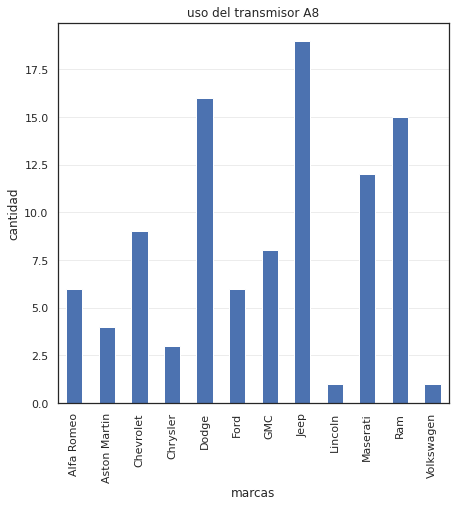

In [ ]:
trmay2 = "A8"
df_tr2 = df[df["Transmission"] == trmay2]

sns.set(rc={'figure.figsize':(7, 7)}) 
sns.set_style("white") #fondo blanco
df_tr2.groupby(['Make']).count().reset_index().plot(x='Make', 
                                                                           y='Transmission', 
                                                                           kind='bar', 
                                                                           legend=False, 
                                                                           ylabel='cantidad', 
                                                                           xlabel='marcas', 
                                                                           title='uso del transmisor A8',
                                                                           )             
plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.15) #lineas horizontales
plt.show()

Vemos que la marca de vehiculos que mas utiliza el transmisor A8 es Jeep.
Numericamente se obtuvo la siguiente distribución:

In [ ]:
dep2 = df_tr2.Make.value_counts() #conteo del uso del transmisor A8
dep2.head(30)

Jeep            19
Dodge           16
Ram             15
Maserati        12
Chevrolet        9
GMC              8
Alfa Romeo       6
Ford             6
Aston Martin     4
Chrysler         3
Lincoln          1
Volkswagen       1
Name: Make, dtype: int64

### transmisor AS10 (tercero mas usado)

Ahora comprobando el uso del tercer transmisor mas usado

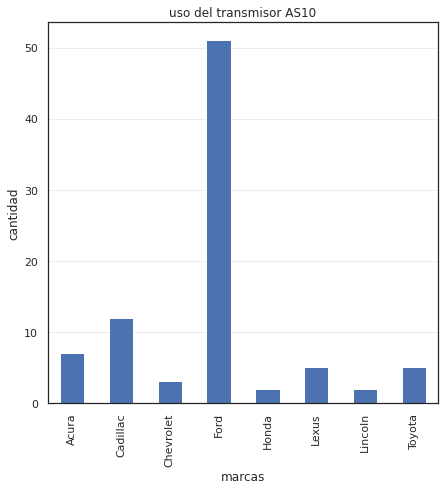

In [ ]:
trmay3 = "AS10"
df_tr3 = df[df["Transmission"] == trmay3]

sns.set(rc={'figure.figsize':(7, 7)}) 
sns.set_style("white") #fondo blanco
df_tr3.groupby(['Make']).count().reset_index().plot(x='Make', 
                                                                           y='Transmission', 
                                                                           kind='bar', 
                                                                           legend=False, 
                                                                           ylabel='cantidad', 
                                                                           xlabel='marcas', 
                                                                           title='uso del transmisor AS10',
                                                                           )             
plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.15) #lineas horizontales
plt.show()

Vemos que la marca de vehiculos que mas utiliza el transmisor AS10 es Ford.
Numericamente se obtuvo la siguiente distribución:

In [ ]:
dep3 = df_tr3.Make.value_counts() #conteo del uso del transmisor AS10
dep3.head(30)

Ford         51
Cadillac     12
Acura         7
Lexus         5
Toyota        5
Chevrolet     3
Honda         2
Lincoln       2
Name: Make, dtype: int64

##resultados transmisores

Como podemos observar de las anteriores tablas, los 3 transmisores mas usados con su respectiva marca mas frecuente es la siguiente:

1. AS8  --->  BMW  (58 de 212 totales)
2. A8   --->  Jeep (19 de 100 totales)
3. AS10 --->  FORD (51 de 87 totales)

# Analisis por clase de vehiculo


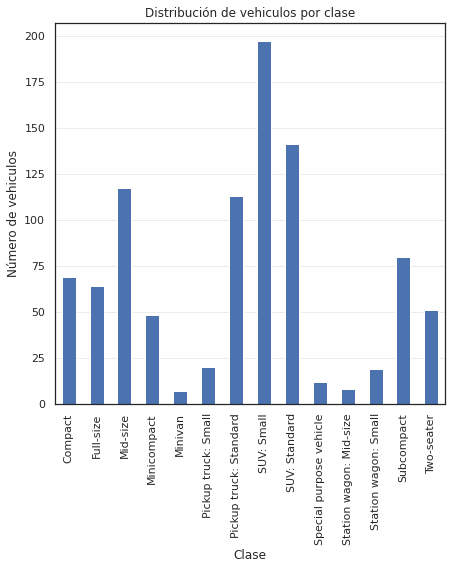

In [5]:
sns.set(rc={'figure.figsize':(7, 7)}) 
sns.set_style("white") 
df.reset_index().groupby(['Vehicle Class']).count().reset_index().plot(x='Vehicle Class', 
                                                                           y='index', 
                                                                           kind='bar', 
                                                                           legend=False, 
                                                                           ylabel='Número de vehiculos', 
                                                                           xlabel='Clase', 
                                                                           title='Distribución de vehiculos por clase',
                                                                           )             
plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.15) #lineas horizontales
plt.show()

En la grafica se observa la distribución de vehiculos por clase, en la cual podemos ver que la clase SUV: small es la que lidera la tabla con mas de 175 vehiculos, seguido de SUV: standard y Mid-size

Procedemos a agrupar los datos por clase de veiculo y tomamos las medidas aritmeticas

In [6]:
dep_mean = df.groupby('Vehicle Class', as_index=False).mean() 
dep_mean.head(14)

,Vehicle Class,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,Compact,2022.0,2.300000,4.492754,9.981159,7.433333,8.840580,33.405797,206.782609,5.826087,5.449275
1,Full-size,2022.0,3.493750,6.437500,12.628125,8.820312,10.920312,28.890625,256.734375,4.687500,4.515625
2,Mid-size,2022.0,2.980342,5.324786,11.300855,7.988034,9.805128,31.034188,229.504274,5.222222,4.811966
3,Minicompact,2022.0,3.204167,6.083333,13.610417,9.943750,11.960417,24.333333,280.208333,4.062500,4.708333
4,Minivan,2022.0,3.257143,5.428571,10.928571,8.100000,9.671429,31.000000,227.000000,5.428571,5.571429
5,Pickup truck: Small,2022.0,2.975000,4.800000,12.435000,9.530000,11.135000,26.000000,270.050000,4.200000,5.000000
6,Pickup truck: Standard,2022.0,4.362832,6.867257,15.076991,11.785841,13.601770,21.469027,309.407080,3.371681,4.876106
7,SUV: Small,2022.0,2.328426,4.416244,10.737056,8.620305,9.780711,29.781726,229.852792,5.091371,5.659898
8,SUV: Standard,2022.0,3.982979,6.723404,14.382979,10.897163,12.811348,22.680851,302.326241,3.574468,4.865248
9,Special purpose vehicle,2022.0,2.116667,4.000000,11.783333,9.550000,10.775000,26.750000,237.500000,4.750000,5.500000


Se grafica el consumo de combustible en ciudad por clase de vehiculo

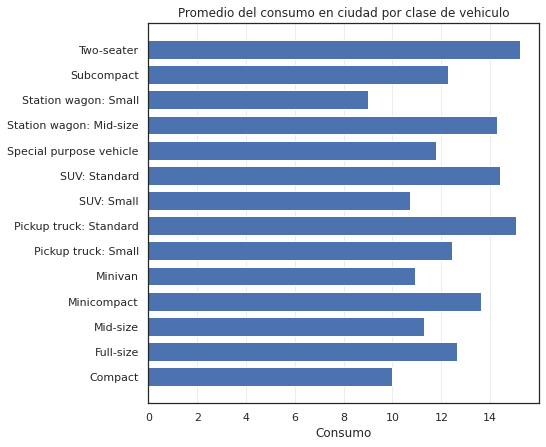

In [7]:
plt.barh(dep_mean['Vehicle Class'], dep_mean['Fuel Consumption (City (L/100 km)'], 0.75)
plt.xlabel('Consumo')
plt.title('Promedio del consumo en ciudad por clase de vehiculo')
plt.gca().xaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.15) 
plt.show()

En el histograma se observa que en promedio las clases de vehiculo con consumo en ciudad más alto son:

*   Two-seater    ->   15.235294	L/100km
*   Pickup truck: Standard   ->   15.076991	L/100km
*   SUV: Standard   ->   14.382979	L/100km

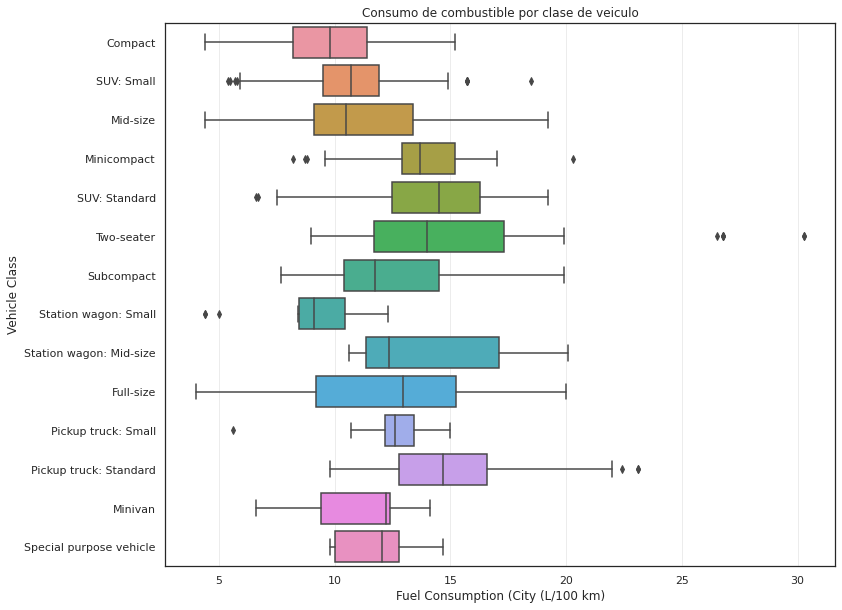

In [8]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.set_style("white") 

sns.boxplot(y=df['Vehicle Class'], x=df['Fuel Consumption (City (L/100 km)'],  orient="h")
plt.title("Consumo de combustible por clase de veiculo")
plt.gca().xaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.15)
plt.show()

Se puede observar que las clases Two-seater fue la unica en superar mas de 30 L/100km de consumo, y la clase de veiculo mas cercana a esta son los Pickup truck: Standard con un consumo inferior a 25 L/100km. 

En la clase Station wagon: small el consumo mas bajo fue inferior a 5 seguido de Suv: small y Pickup truck: small. 

Otra cosa a resaltar es que la cantidad de valores atipicos no es mucha, y de igual manera hay casi la misma cantidad de valores atipipos para bajos consumos como para altos

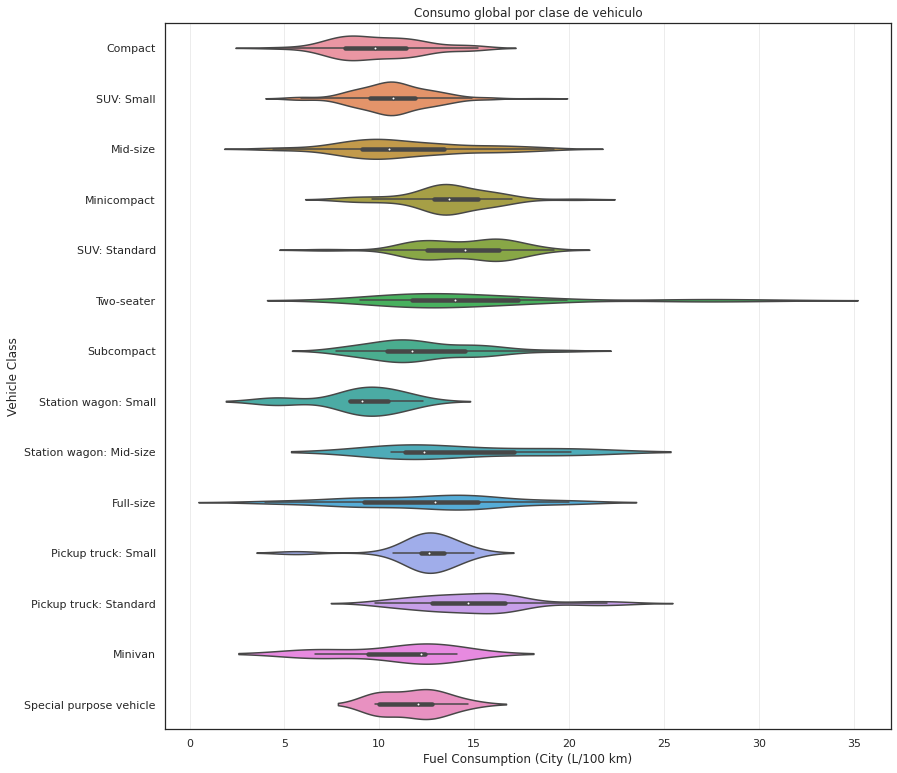

In [9]:
sns.set(rc={'figure.figsize':(13, 13)})
sns.set_style("white") 
sns.violinplot(y=df['Vehicle Class'], x=df['Fuel Consumption (City (L/100 km)'],  orient="h")
plt.title("Consumo global por clase de vehiculo")
plt.gca().xaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.15) 
plt.show()